In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gbor.main import BoostedOrdinal
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import time
from sklearn.model_selection import cross_val_score, RepeatedKFold

wine_red = pd.read_csv('../data/winequality-red.csv', sep = ';')
#wine_red = pd.read_csv('../data/winequality-white.csv', sep = ';')
wine_red['quality'] = wine_red['quality'] - np.min(wine_red['quality'])

X, y = wine_red.drop(columns = ['quality']).to_numpy(), wine_red['quality'].to_numpy(dtype = 'int')

In [25]:
start_time = time.time()
gbor = BoostedOrdinal(
    n_iter_no_change = 10, max_iter = 10000
    , base_learner = DecisionTreeRegressor(max_depth = 6)
    , lr_g = 1e-1
    , lr_theta = 1#e-4
    , validation_stratify = False
    , validation_fraction = 0.2
    , reltol = 0
).fit(X, y)
end_time = time.time()
print('time: {} sec'.format(round(end_time - start_time, 1)))

time: 36.2 sec


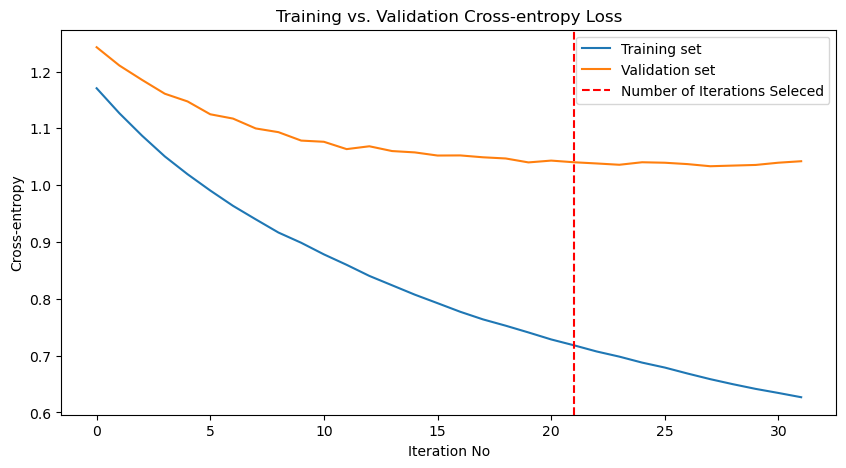

In [26]:
gbor.plot_cross_entropy_loss()